In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [3]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2]])
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

#### 1. Подберите скорость обучения (alpha) и количество итераций:

In [4]:
n = X.shape[1]
alpha = 1e-4
W = np.array([1, 0.5])
W, alpha

(array([1. , 0.5]), 0.0001)

In [5]:
cost_history_base = []
for i in range(1000): 
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)    
    for ii in range(W.shape[0]):
        W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))
    if i % 100 == 0:
        print(i, W, err)
    cost_history_base.append(err)


0 [1.01102 0.534  ] 3173.15
100 [2.02168794 3.452835  ] 2207.6942101483005
200 [2.88306663 5.58962851] 1670.7027004086372
300 [3.63289519 7.14848061] 1368.0832412796256
400 [4.29908617 8.28027926] 1193.7493344933293
500 [4.90228732 9.09657298] 1089.714750358689
600 [5.45777535 9.67982684] 1024.2828984889416
700 [ 5.97685612 10.0910047 ] 980.1260644155933
800 [ 6.46789973 10.37517467] 947.770026039189
900 [ 6.93710574 10.56565326] 922.0330206910178


In [6]:
alpha = 0.0574
W = np.array([1, 0.5])

n = 10
err_prev = 0
i = 0
while (np.abs(err_prev - err)) > 0.005: 
    y_pred = np.dot(W, X)
    err_prev = err
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot(X,(y_pred - y))))
    if i % n == 0:
        print(i, W, err)
    i += 1
if i % n != 0:
    print(i, W, err)
print('\nскорость обучения (alpha) =', alpha)
print('количество итераций =', i)

0 [ 7.32548 20.016  ] 3173.15
10 [24.8903717   8.41794304] 355.2659830933307
20 [35.12407994  6.16323346] 135.12932084263176
30 [40.6870786   5.12003883] 71.98527028889062
40 [43.69491572  4.56392215] 53.54518488915843
50 [45.3205091   4.26371347] 48.159452223313956
60 [46.19903457  4.10148569] 46.586458490304125
70 [46.67381802  4.01381324] 46.12703923389026
80 [46.93040622  3.96643226] 45.99285811877102
85 [46.99624473  3.95427468] 45.97133562507598

скорость обучения (alpha) = 0.0574
количество итераций = 85


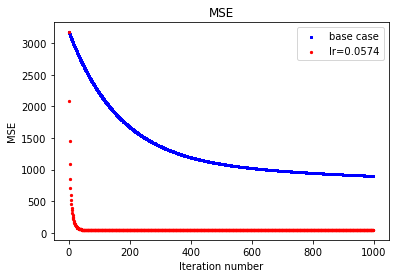

In [7]:
W = np.array([1, 0.5])
cost_history_adj = []
for i in range(1000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    W -= (alpha * (1/n * 2 * np.dot(X,(y_pred - y))))
    cost_history_adj.append(err)


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(1000), cost_history_base, s=5, c='b', marker="s", label='base case')
ax1.scatter(range(1000), cost_history_adj, s=5, c='r', marker="o", label=f'lr={alpha}')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.legend(loc='upper right');
plt.show()

#### *2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее:

In [8]:
alpha = 0.06
n_iter = 70
W = np.array([1, 0.5])
for i in range(n_iter+1):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    '''for ii in range(W.shape[0]):
    W[ii] -= alpha * (1/n * 2 * np.sum(X[ii] * (y_pred - y)))'''
    W -= (alpha * (1/n * 2 * np.dot(X,(y_pred - y))))
    if i % 10 == 0:
        print(i, W, err)

0 [ 7.612 20.9  ] 3173.15
10 [25.72983979  9.05170097] 364.6834436471203
20 [35.85695572  6.15284752] 125.86627725452959
30 [41.24888118  5.03270471] 67.85926616474043
40 [44.0891315   4.49316871] 51.98014546835957
50 [45.5816168   4.21574742] 47.603575735386116
60 [46.3654434   4.07078732] 46.39687623882493
70 [46.77704197  3.99475582] 46.064160921425916
